The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


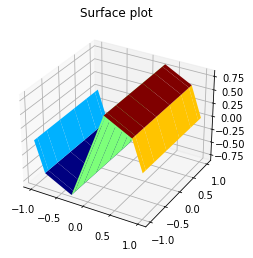

(6, 8)

In [88]:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib.pyplot as plt
from pypde.bases import *
from pypde.field import *

N,M = 6,8
shape = (N,M)
S = Field(shape,("CD","CD"))



# Space
x,y = S.x, S.y
xx,yy = np.meshgrid(x,y,indexing="ij")
f = np.sin(np.pi* xx)#+0.5*xx-0.5

# Boundary conditions
bc = np.zeros((2,M))
bc[0] = y
Sbc = SpectralSpaceBC(bc.shape,("CD","CD"),axis=0)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(xx, yy, f,cmap='jet', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

S.shape_physical

In [89]:
bc = Sbc.forward_fft(bc,axis=0)
fhat = S.forward_fft(f,axis=0,bc=bc)
fhat

array([[ 0.4       ,  0.36038755,  0.24939592,  0.08900837, -0.08900837,
        -0.24939592, -0.36038755, -0.4       ],
       [ 0.26947484,  0.29918418,  0.3824279 ,  0.50271856,  0.63623112,
         0.75652178,  0.8397655 ,  0.86947484],
       [ 0.2       ,  0.18019377,  0.12469796,  0.04450419, -0.04450419,
        -0.12469796, -0.18019377, -0.2       ],
       [-0.20428237, -0.19437925, -0.16663135, -0.12653446, -0.08203027,
        -0.04193339, -0.01418548, -0.00428237]])

In [56]:
fhat = S.forward(f)
fs = S.backward(fhat)

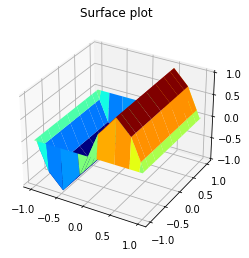

In [57]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(xx, yy, fs,cmap='jet', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [13]:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib.pyplot as plt
from pypde.bases import *
from pypde.field import *

N,M = 60,40
shape = (N,M)
S = Field(shape,("CD","CD"))

# Space
x,y = S.x, S.y
xx,yy = np.meshgrid(x,y,indexing="ij")
f = np.sin(np.pi* xx)#+0.5*xx-0.5

# Boundary conditions
bc = np.zeros((2,M))
bc[0] = y
bc[1] = -y
bcx = np.zeros((N,2))
bcx[:,0] = x
Sbc = SpectralSpaceBC(bc.shape,("CD","CD"),axis=0,value=bc)

S.add_bc(bc,axis=0)
S.add_bc(bcx,axis=1)

In [14]:
fhat = S.forward(f,True)
fcd = S.backward(fhat,True)

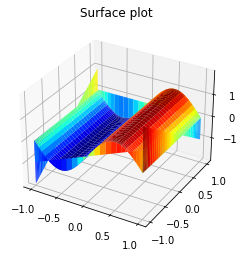

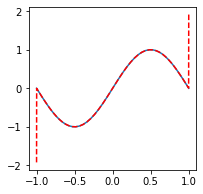

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(xx, yy, fcd,cmap='jet', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

fig,ax = plt.subplots(figsize=(3,3))
ax.plot(x,f[:,4])
ax.plot(x,fcd[:,4],"r--")
plt.show()

In [16]:
for i in np.arange(2,0,-1):
    print(i)

2
1


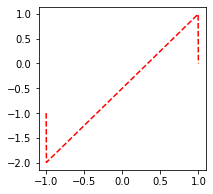

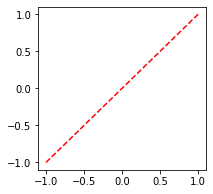

In [17]:
fig,ax = plt.subplots(figsize=(3,3))
ax.plot(y,fcd[0,:],"r--")
plt.show()

fig,ax = plt.subplots(figsize=(3,3))
ax.plot(x,fcd[:,0],"r--")
plt.show()

In [47]:
from pypde.field import *
N,M = 100,50
field = Field((N,M),("CD","CD"))
# Spatial info
xx,yy = np.meshgrid(field.x,field.y,indexing="ij")

# Boundary conditions
bcx = np.zeros((2,M))
bcx[0] = np.sin(np.pi*field.y)+1
bcy = np.zeros((N,2))
bcy[:,0] = np.sin(np.pi*field.x)+1
field.add_bc(bcx,axis=0)
field.add_bc(bcy,axis=1)

# Transform
f = np.sin(np.pi* xx)
fhat = field.forward(f)
fcd = field.backward(fhat)

#assert np.allclose(f,fcd)

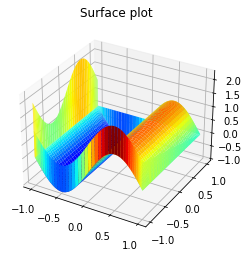

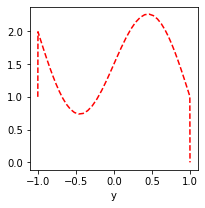

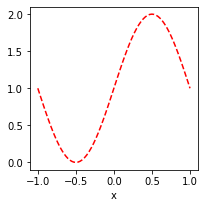

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(xx, yy, fcd,cmap='jet', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

fig,ax = plt.subplots(figsize=(3,3))
ax.plot(field.y,fcd[0,:],"r--")
ax.set_xlabel("y")
plt.show()


fig,ax = plt.subplots(figsize=(3,3))
ax.plot(field.x,fcd[:,0],"r--")
ax.set_xlabel("x")
plt.show()




In [9]:
f[0,:]= field.y
f[:,0]= field.x
assert np.allclose(f,fcd)

AssertionError: 